<a href="https://colab.research.google.com/github/zugbaa/RUSU_projekt_email_spam_filter/blob/main/Email_spam_filter_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/spam.csv")

df = df[['Body', 'Label']]

print(df)

                                                   Body  Label
0     Subject: stock promo mover : cwtd\n * * * urge...      1
1     Subject: are you listed in major search engine...      1
2     Subject: important information thu , 30 jun 20...      1
3     Subject: = ? utf - 8 ? q ? bask your life with...      1
4     Subject: " bidstogo " is places to go , things...      1
...                                                 ...    ...
3995  Subject: revison # 1 - hpl noms . for november...      0
3996  Subject: hpl nom for december 27 , 2000\n ( se...      0
3997  Subject: akamai\n kevin ,\n i have followed up...      0
3998  Subject: re : summary spreadsheet for data ven...      0
3999  Subject: re : congratulations\n congratulation...      0

[4000 rows x 2 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], stratify=df['Label'])

In [ ]:
X_train.describe()

count                                                  3000
unique                                                 2965
top       Subject: calpine daily gas nomination\n >\n ri...
freq                                                      3
Name: Body, dtype: object

In [ ]:
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
X_test_count = cv.transform(X_test)
model.score(X_test_count, y_test)

0.981

In [ ]:
email = ["subject: phone /r you won a new phone"]
email_count = cv.transform(email)
model.predict(email_count)

array([1])

In [ ]:

y_predicted = model.predict(X_test_count)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[489  11]
 [  8 492]]


Text(50.722222222222214, 0.5, 'truth')

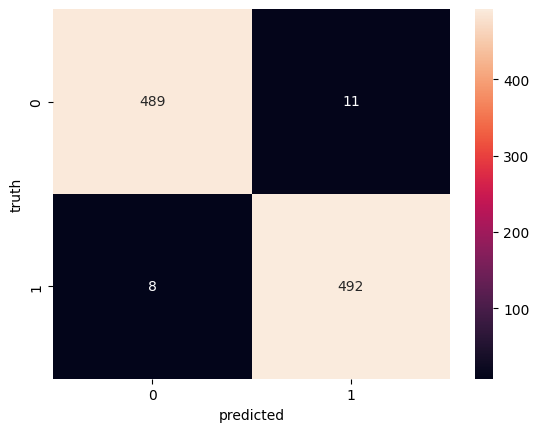

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.98      0.98      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

